#### Zugriff aus python mit Hilfe von Pandas

In [638]:
import sqlite3 as sql
import pandas as pd
import torch
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib
import dateutil
import datetime
import sklearn

Baue eine Verbindung zur meiner Datenbank auf:

In [639]:
conn = sql.connect('../data/20190403_s_home-assistant_v2.db')

### Die Daten aus der SQL mit Hilfe von Pandas auslesen

Tabellennamen ermitteln

In [640]:
table_names = pd.read_sql_query('select name from sqlite_master where type = "table"', conn)
table_names

,name
0,events
1,recorder_runs
2,schema_changes
3,states


Tabelle events einlesen

In [637]:
events = pd.read_sql_query('select * from events', conn)

DatabaseError: database disk image is malformed

In [588]:
events.tail(100)

NameError: name 'events' is not defined

#### Tabelle recorder_runs einlesen

In [589]:
recorder_runs = pd.read_sql_query('select * from recorder_runs', conn)

In [590]:
recorder_runs.head()

,run_id,start,end,closed_incorrect,created
0,1,2019-03-14 20:25:23.434947,2019-03-14 20:30:46.775168,0,2019-03-14 20:25:26.805756
1,2,2019-03-14 20:30:58.627587,2019-03-14 20:34:30.843322,0,2019-03-14 20:31:01.310771
2,3,2019-03-14 20:34:43.543716,2019-03-14 20:37:48.007651,0,2019-03-14 20:34:46.236966
3,4,2019-03-14 20:37:59.974984,2019-03-14 20:42:23.147717,0,2019-03-14 20:38:02.612598
4,5,2019-03-14 20:42:35.949202,2019-03-14 20:59:04.860145,0,2019-03-14 20:42:38.634857


#### Tabelle schema_changes einlesen

In [591]:
schema_changes = pd.read_sql_query('select * from schema_changes', conn)

In [592]:
schema_changes.head()

,change_id,schema_version,changed
0,1,7,2019-03-14 20:25:26.737487


#### Tabelle states einlesen

In [654]:
states = pd.read_sql_query('select * from states where (domain like "sensor") and (entity_id like "%weather%")', conn)

In [658]:
weather_opts =['temperature','symbol','precipitation','windSpeed','pressure','windDirection','humidity','fog','cloudiness','lowClouds','mediumClouds','highClouds','dewpointTemperature']

### Vertiefung der Datensuche in der states Tabelle entity sensor

In [595]:
sensor = states[states['entity_id'].str.contains('sensor')]

In [659]:
weather = states[states['entity_id'].str.contains('weather')]
weather.head(20)

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
0,14814,sensor,sensor.weather_pressure,1025.9,"{""attribution"": ""Weather forecast from met.no,...",15385,2019-03-21 21:31:00.074823,2019-03-21 21:31:00.074823,2019-03-21 21:31:00.084886,377e85e4758141c09f1759cd69309974,None
1,14815,sensor,sensor.weather_dewpoint_temperature,8.5,"{""attribution"": ""Weather forecast from met.no,...",15386,2019-03-21 21:31:00.075290,2019-03-21 21:31:00.075290,2019-03-21 21:31:00.146653,4903572e085844e09efde442735248de,None
2,14816,sensor,sensor.weather_wind_direction,182.3,"{""attribution"": ""Weather forecast from met.no,...",15387,2019-03-21 21:31:00.075676,2019-03-21 21:31:00.075676,2019-03-21 21:31:00.205605,2fc1d445292246ba8e1d68e3d5a07c8f,None
3,14817,sensor,sensor.weather_humidity,90.5,"{""attribution"": ""Weather forecast from met.no,...",15388,2019-03-21 21:31:00.076042,2019-03-21 21:31:00.076042,2019-03-21 21:31:00.279088,76d04b2c6c264c29ba5eb5a514ea9d34,None
4,14818,sensor,sensor.weather_temperature,9.9,"{""attribution"": ""Weather forecast from met.no,...",15389,2019-03-21 21:31:00.076497,2019-03-21 21:31:00.076497,2019-03-21 21:31:00.339438,34eea163d90a435995bce7c7354eff7e,None
5,14819,sensor,sensor.weather_wind_speed,3.6,"{""attribution"": ""Weather forecast from met.no,...",15390,2019-03-21 21:31:00.076865,2019-03-21 21:31:00.076865,2019-03-21 21:31:00.401810,3b79219fec8540cdb1b02b0a89fc4abd,None
6,14893,sensor,sensor.weather_high_clouds,32.0,"{""attribution"": ""Weather forecast from met.no,...",15464,2019-03-21 22:31:00.074851,2019-03-21 22:31:00.074851,2019-03-21 22:31:00.086160,f4632fb21d6b47e8812539a7bfee0d1a,None
7,14894,sensor,sensor.weather_wind_direction,199.1,"{""attribution"": ""Weather forecast from met.no,...",15465,2019-03-21 22:31:00.075332,2019-03-21 22:31:00.075332,2019-03-21 22:31:00.149188,a9b93599b42b4315977b1768c86a5f6d,None
8,14895,sensor,sensor.weather_wind_speed,3.5,"{""attribution"": ""Weather forecast from met.no,...",15466,2019-03-21 22:31:00.075709,2019-03-21 22:31:00.075709,2019-03-21 22:31:00.212795,743855aa716d46a492b2ed58ad4e5f1b,None
9,14896,sensor,sensor.weather_pressure,1025.7,"{""attribution"": ""Weather forecast from met.no,...",15467,2019-03-21 22:31:00.076074,2019-03-21 22:31:00.076074,2019-03-21 22:31:00.279032,c49af742227f4028aa8eb21c331d09b7,None


In [597]:
state_sensor_living_room  = sensor[sensor['entity_id'].str.contains('living')]
state_sensor_living_room.head(10)

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
6380,21140,sensor,sensor.living_room_wt_current_temperature,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22264,2019-03-25 19:57:44.973797,2019-03-25 19:57:44.973797,2019-03-25 19:57:52.070935,ce0fc3a423974300a3692d82d30655dc,None
6381,21141,sensor,sensor.living_room_wt_set_temperature,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22265,2019-03-25 19:57:44.974569,2019-03-25 19:57:44.974569,2019-03-25 19:57:52.136055,86d6f368cd094e108494d4086f90c220,None
6382,21142,sensor,sensor.living_room_wt_mode,unknown,"{""unit_of_measurement"": """", ""friendly_name"": ""...",22266,2019-03-25 19:57:44.975335,2019-03-25 19:57:44.975335,2019-03-25 19:57:52.200638,fe08497741454ef89601ce0c53f7518c,None
6383,21143,sensor,sensor.living_room_ht_south_current_temperature,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22267,2019-03-25 19:57:44.976205,2019-03-25 19:57:44.976205,2019-03-25 19:57:52.254811,aebbee5404cf4187bb0636b942519ed3,None
6384,21144,sensor,sensor.living_room_ht_south_set_temperature_bath,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22268,2019-03-25 19:57:44.977049,2019-03-25 19:57:44.977049,2019-03-25 19:57:52.315175,e598396b4caf420db8959e76cba927eb,None
6385,21145,sensor,sensor.living_room_ht_south_mode,unknown,"{""unit_of_measurement"": """", ""friendly_name"": ""...",22269,2019-03-25 19:57:44.977866,2019-03-25 19:57:44.977866,2019-03-25 19:57:52.376552,1198268b5e5e4f29b194fe06cf126691,None
6386,21146,sensor,sensor.living_room_ht_north_current_temperature,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22270,2019-03-25 19:57:44.978697,2019-03-25 19:57:44.978697,2019-03-25 19:57:52.435386,9f20634456b44ca1be6f8cbec30b0c4f,None
6387,21147,sensor,sensor.living_room_ht_north_set_temperature_bath,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22271,2019-03-25 19:57:44.979541,2019-03-25 19:57:44.979541,2019-03-25 19:57:52.484922,54fae313ec214491959b117a9b8040d9,None
6388,21148,sensor,sensor.living_room_ht_north_mode,unknown,"{""unit_of_measurement"": """", ""friendly_name"": ""...",22272,2019-03-25 19:57:44.980351,2019-03-25 19:57:44.980351,2019-03-25 19:57:52.548418,09e6f991d1a64fdfa4a4084584558e58,None
6420,21180,sensor,sensor.living_room_wt_current_temperature,20.3,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",22337,2019-03-25 19:57:46.455667,2019-03-25 19:57:46.455667,2019-03-25 19:57:56.420053,bb15d6ccf39a409f9412be8b57570944,None


In [598]:
state_sensor_living_room_clean = state_sensor_living_room.loc[:,('entity_id','state','last_updated')]
state_sensor_living_room_clean = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('temperature')]
state_sensor_living_room_clean = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('wt')]
living_room_wt_tcurr = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('current')]
living_room_wt_tset = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('set')]


In [599]:
living_room_wt_tcurr.loc[:,'last_updated'] = living_room_wt_tcurr['last_updated'].map(lambda x: dateutil.parser.parse(x))

/Users/cm/anaconda3/envs/week_program/lib/python3.6/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [600]:
living_room_wt_tset.loc[:,'last_updated'] = living_room_wt_tset['last_updated'].map(lambda x: dateutil.parser.parse(x))

In [601]:
living_room_wt_tcurr[living_room_wt_tcurr.state =='unknown']

,entity_id,state,last_updated
6380,sensor.living_room_wt_current_temperature,unknown,2019-03-25 19:57:44.973797
6467,sensor.living_room_wt_current_temperature,unknown,2019-03-25 20:16:55.788703
6532,sensor.living_room_wt_current_temperature,unknown,2019-03-25 20:19:18.571112
6606,sensor.living_room_wt_current_temperature,unknown,2019-03-25 20:20:51.046538
13573,sensor.living_room_wt_current_temperature,unknown,2019-04-01 18:25:58.493465
13686,sensor.living_room_wt_current_temperature,unknown,2019-04-01 18:31:22.275019
14040,sensor.living_room_wt_current_temperature,unknown,2019-04-02 18:15:06.541663


In [602]:
living_room_wt_tcurr = living_room_wt_tcurr[living_room_wt_tcurr.state !='unknown']
living_room_wt_tcurr = living_room_wt_tcurr[living_room_wt_tcurr.state !='None']
living_room_wt_tcurr = living_room_wt_tcurr[(living_room_wt_tcurr['last_updated'] > start_date) & (living_room_wt_tcurr['last_updated'] < end_date)]
living_room_wt_tcurr['state'] = living_room_wt_tcurr['state'].astype(float)

In [603]:
living_room_wt_tset = living_room_wt_tset[living_room_wt_tset.state !='unknown']
living_room_wt_tset = living_room_wt_tset[living_room_wt_tset.state !='None']
living_room_wt_tset = living_room_wt_tset[(living_room_wt_tset['last_updated'] > start_date) & (living_room_wt_tset['last_updated'] < end_date)]
living_room_wt_tset['state'] = living_room_wt_tset['state'].astype(float)

In [604]:
living_room_wt_tcurr.head()

,entity_id,state,last_updated
14761,sensor.living_room_wt_current_temperature,20.1,2019-04-03 00:07:45.024408
14766,sensor.living_room_wt_current_temperature,20.2,2019-04-03 00:10:49.858501
14815,sensor.living_room_wt_current_temperature,20.1,2019-04-03 00:44:22.906733
14832,sensor.living_room_wt_current_temperature,20.2,2019-04-03 00:56:33.026497
14837,sensor.living_room_wt_current_temperature,20.1,2019-04-03 00:59:36.022962


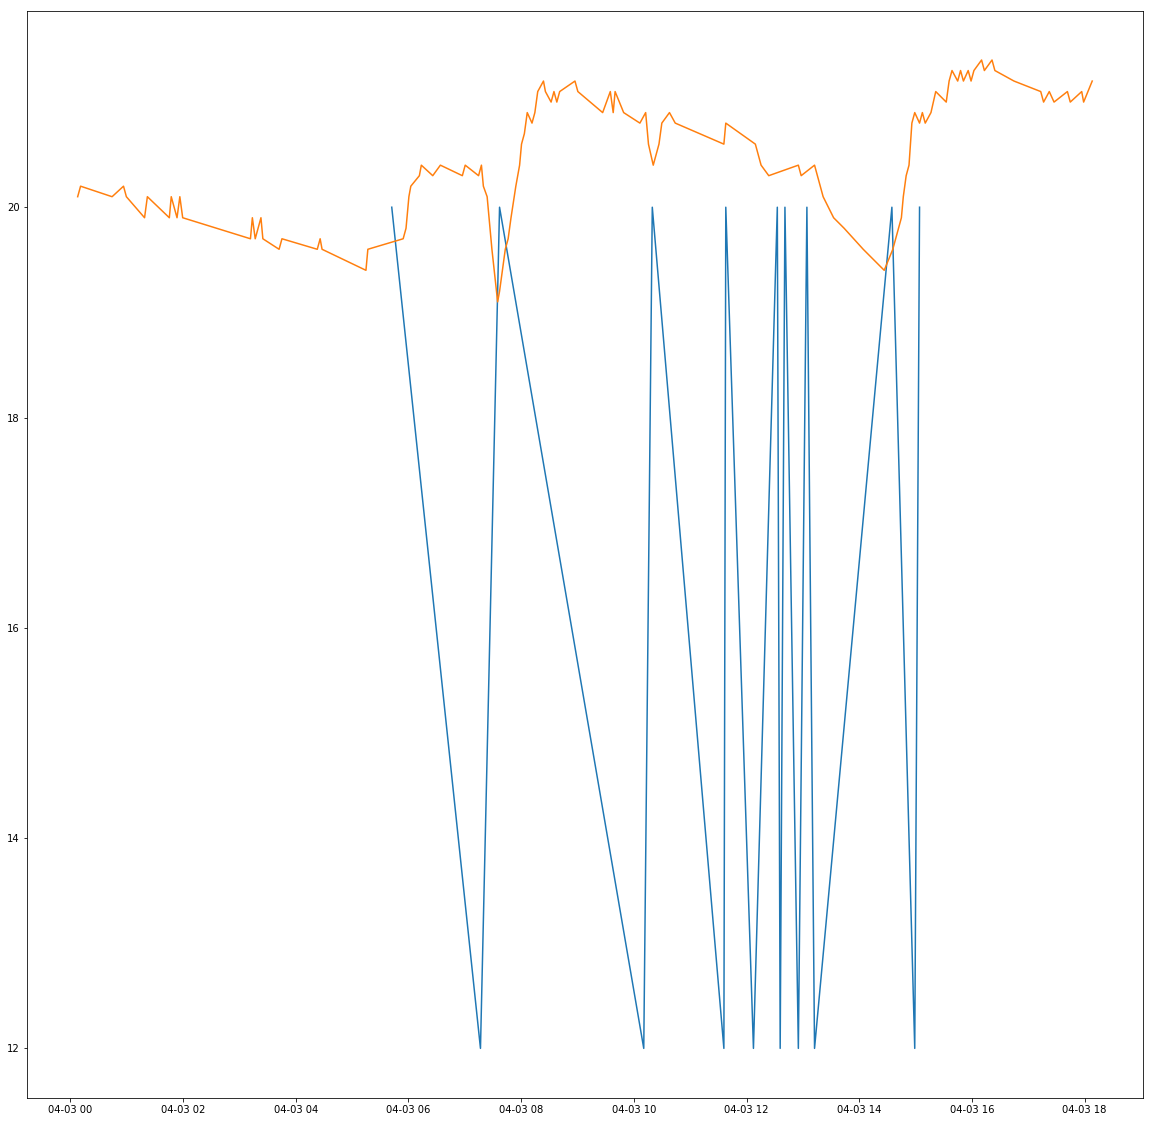

In [605]:
dates = matplotlib.dates.date2num(living_room_wt_tcurr['last_updated'])
fig1 = matplotlib.pyplot.figure(figsize=[20,20])
dates2 = matplotlib.dates.date2num(living_room_wt_tset['last_updated'])
matplotlib.pyplot.plot_date(dates2, living_room_wt_tset['state'], '-')
matplotlib.pyplot.plot_date(dates, living_room_wt_tcurr['state'], '-');

In [606]:
end_date = np.datetime64('2019-04-03 23:59:00')
start_date = np.datetime64('2019-04-03 00:00:00')

In [607]:
pd.read_sql_query('SELECT entity_id, COUNT(*) as count FROM states GROUP BY entity_id', conn).head()

,entity_id,count
0,binary_sensor.bad_fensterkontakt_bad,7
1,binary_sensor.kuche_fensterkontakt_ku,15
2,binary_sensor.remote_ui,1
3,binary_sensor.schlafzimmer_fensterkontakt_sz,17
4,binary_sensor.wohnzimmer_fensterkontakt_nord,25


In [608]:
living_room_wt_tcurr.head()

,entity_id,state,last_updated
14761,sensor.living_room_wt_current_temperature,20.1,2019-04-03 00:07:45.024408
14766,sensor.living_room_wt_current_temperature,20.2,2019-04-03 00:10:49.858501
14815,sensor.living_room_wt_current_temperature,20.1,2019-04-03 00:44:22.906733
14832,sensor.living_room_wt_current_temperature,20.2,2019-04-03 00:56:33.026497
14837,sensor.living_room_wt_current_temperature,20.1,2019-04-03 00:59:36.022962


In [612]:
#if living_room_wt_tcurr.dtypes[2] != np.:

living_room_wt_tcurr['last_updated'] = living_room_wt_tcurr['last_updated'].map(lambda x: dateutil.parser.parse(x))

TypeError: Parser must be a string or character stream, not Timestamp

In [613]:
living_room_wt_tcurr.dtypes[2]

dtype('<M8[ns]')

In [614]:
living_room_wt_tcurr['weekday'] = living_room_wt_tcurr['last_updated'].dt.weekday
living_room_wt_tcurr['time'] = living_room_wt_tcurr['last_updated'].dt.time

In [615]:
living_room_wt_tcurr['time'] = living_room_wt_tcurr['time'].map(lambda x:x.hour+x.minute/60.0)

In [616]:
X_train = living_room_wt_tcurr.drop(['entity_id','state','last_updated'], axis=1)
y_train = living_room_wt_tcurr['state']

In [617]:
X_train.shape

(124, 2)

In [618]:
living_room_wt_tcurr = living_room_wt_tcurr[(living_room_wt_tcurr['last_updated'] > start_date) & (living_room_wt_tcurr['last_updated'] < end_date)]
living_room_wt_tcurr = living_room_wt_tcurr.sort_values(by=['state'])

### Vertiefung der Datensuche in der states Tabelle entity climate

In [619]:
climate = states[states['entity_id'].str.contains('climate')]

In [620]:
climate.head(2)

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
2,14762,climate,climate.kuche_wandthermostat_ku,manual,"{""current_temperature"": 17.1, ""min_temp"": 4.5,...",15333,2019-03-19 12:22:26.953017,2019-03-21 20:53:10.910853,2019-03-21 20:53:10.920476,db71971761af464eb7e1cf61ddacb389,None
8,14768,climate,climate.kuche_wandthermostat_ku,manual,"{""current_temperature"": 16.8, ""min_temp"": 4.5,...",15339,2019-03-19 12:22:26.953017,2019-03-21 20:58:15.903207,2019-03-21 20:58:15.923933,43546b1dcaa64b669b7083caa7125fbc,None


In [621]:
state_climate_living_room  = climate[climate['entity_id'].str.contains('schlaf')]
state_climate_living_room.head(2)

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
16,14776,climate,climate.schlafzimmer_wandthermostat_sz,manual,"{""current_temperature"": 16.8, ""min_temp"": 4.5,...",15347,2019-03-19 12:22:26.960718,2019-03-21 21:03:20.929233,2019-03-21 21:03:20.990934,979dc5d2b49148eda7a09ff6ccee441d,None
23,14783,climate,climate.schlafzimmer_wandthermostat_sz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",15354,2019-03-19 12:22:26.960718,2019-03-21 21:08:25.907017,2019-03-21 21:08:25.928975,91637af2311f4ba28c0ed220f5c613c0,None


In [485]:
state_climate_living_room = state_climate_living_room.loc[:,('entity_id','state','attributes','last_updated')]

In [486]:
state_climate_living_room['last_updated'] = state_climate_living_room['last_updated'].map(lambda x: dateutil.parser.parse(x))

In [487]:
state_climate_living_room = state_climate_living_room[(state_climate_living_room['last_updated'] > start_date) & (state_climate_living_room['last_updated'] < end_date)]

In [488]:
state_climate_living_room['weekday'] = state_climate_living_room['last_updated'].dt.weekday
state_climate_living_room['time'] = state_climate_living_room['last_updated'].dt.time

In [489]:
state_climate_living_room.head(2)

,entity_id,state,attributes,last_updated,weekday,time
14748,climate.schlafzimmer_wandthermostat_sz,auto,"{""current_temperature"": 20.0, ""min_temp"": 4.5,...",2019-04-03 00:01:39.011027,2,00:01:39.011027
14755,climate.schlafzimmer_wandthermostat_sz,auto,"{""current_temperature"": 19.8, ""min_temp"": 4.5,...",2019-04-03 00:04:42.008518,2,00:04:42.008518


In [490]:
#state_climate_living_room = state_climate_living_room[(state_climate_living_room['last_updated'] > start_date) & (state_climate_living_room['last_updated'] < end_date)]

In [491]:
current_temp = []
set_temp = []
for value in state_climate_living_room['attributes']:
    json_acceptable_string = value.replace("'", "\"")
    dicti = json.loads(json_acceptable_string)
    current_temp.append(dicti['current_temperature'])
    set_temp.append(dicti['temperature'])

In [492]:
state_climate_living_room['current_temp'] = current_temp
state_climate_living_room['set_temp'] = set_temp

In [493]:
state_climate_living_room_as_x = state_climate_living_room.drop(['entity_id','attributes','last_updated'],axis=1)

In [494]:
state_climate_living_room_as_x.head(30)

,state,weekday,time,current_temp,set_temp
14748,auto,2,00:01:39.011027,20.0,18.0
14755,auto,2,00:04:42.008518,19.8,18.0
14896,auto,2,01:34:10.010345,19.6,18.0
14900,auto,2,01:36:12.010931,19.8,18.0
14908,auto,2,01:42:18.028723,19.6,18.0
14928,auto,2,01:53:31.866646,19.8,18.0
14938,auto,2,01:59:34.014984,19.6,18.0
15077,auto,2,03:37:08.013528,19.5,18.0
15116,auto,2,04:00:31.038779,19.5,20.0
15122,auto,2,04:02:33.867404,19.5,18.0


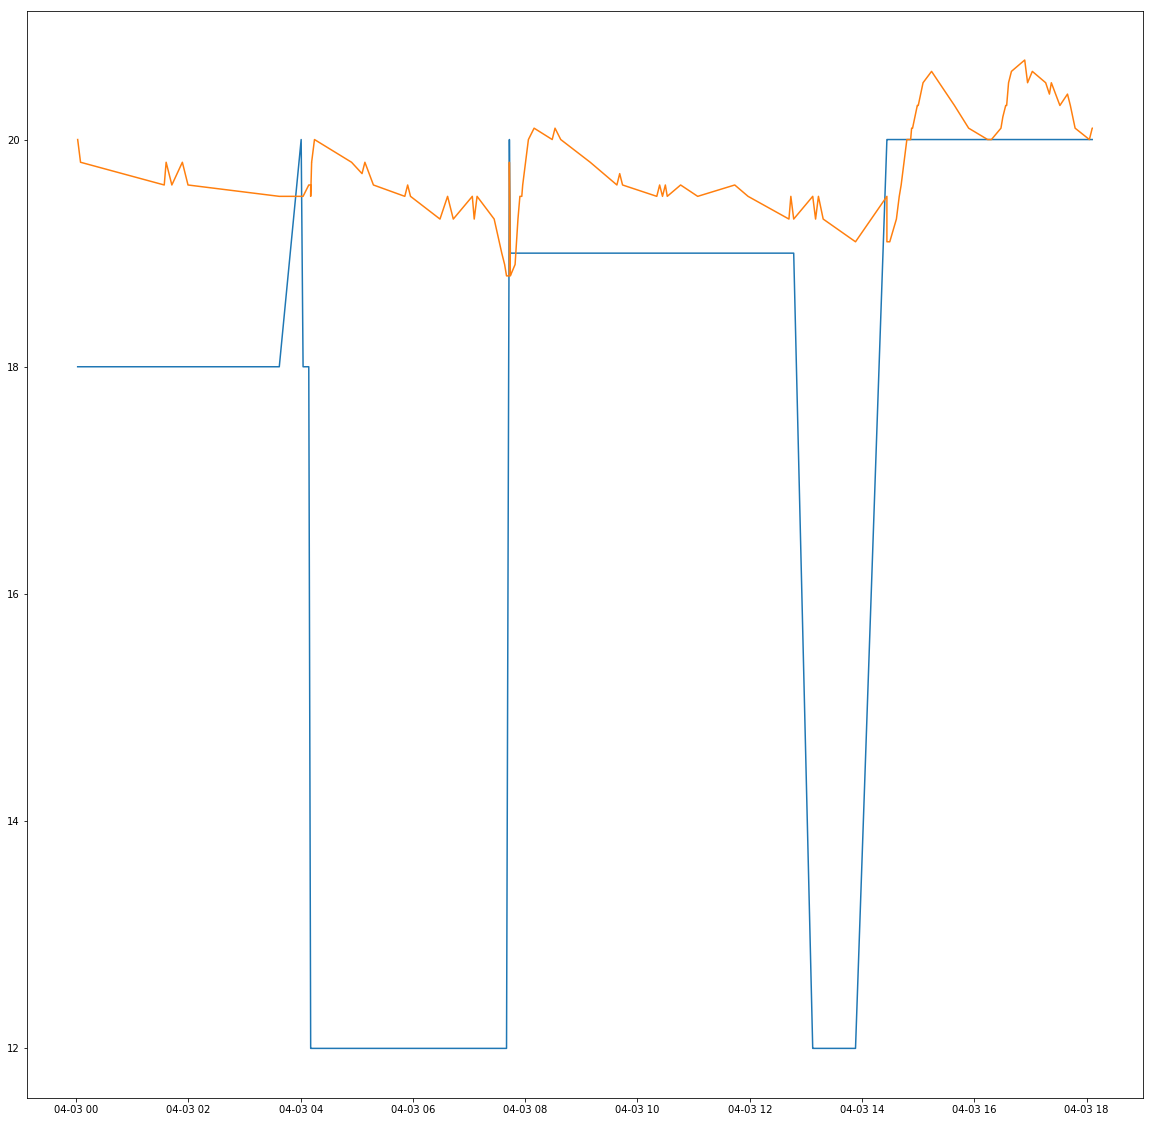

In [495]:
dates = matplotlib.dates.date2num(state_climate_living_room['last_updated'])
fig1 = matplotlib.pyplot.figure(figsize=[20,20])
matplotlib.pyplot.plot_date(dates, set_temp, '-')
matplotlib.pyplot.plot_date(dates, current_temp, '-')
#matplotlib.pyplot.plot_date(dates, state_climate_living_room_as_x['twp'], '-');

In [496]:
time_steps = [datetime.time(0, 0, 0, 0),datetime.time(6, 30, 0, 0),datetime.time(20, 30, 0, 0),datetime.time(21, 30, 0, 0),datetime.time(23, 59, 0, 0)]
set_temp_wp = [17.0, 20.0, 18.5,17.0,17.0]

In [497]:
def add_wp(time_steps,set_temps,time_row):
    for index, ti in enumerate(time_steps):
        if time_row < ti:
            #print(str(time_row) + ' ' +str(ti)+' ' + str(index) + ' ' + str(set_temps[index-1]))
            return set_temps[index-1]
    

In [498]:
weekprogram = []
for row in state_climate_living_room_as_x.index:
    weekprogram.append(add_wp(time_steps, set_temp_wp, state_climate_living_room_as_x.loc[row,'time']))

In [499]:
state_climate_living_room_as_x['twp'] = weekprogram

In [500]:
state_climate_living_room_as_x

,state,weekday,time,current_temp,set_temp,twp
14748,auto,2,00:01:39.011027,20.0,18.0,17.0
14755,auto,2,00:04:42.008518,19.8,18.0,17.0
14896,auto,2,01:34:10.010345,19.6,18.0,17.0
14900,auto,2,01:36:12.010931,19.8,18.0,17.0
14908,auto,2,01:42:18.028723,19.6,18.0,17.0
14928,auto,2,01:53:31.866646,19.8,18.0,17.0
14938,auto,2,01:59:34.014984,19.6,18.0,17.0
15077,auto,2,03:37:08.013528,19.5,18.0,17.0
15116,auto,2,04:00:31.038779,19.5,20.0,17.0
15122,auto,2,04:02:33.867404,19.5,18.0,17.0


In [501]:
categorical = pd.get_dummies(state_climate_living_room_as_x[['state']])
state_climate_living_room_as_x = pd.concat([state_climate_living_room_as_x, categorical], axis=1, sort=False)



In [502]:
state_climate_living_room_as_x['time'] = state_climate_living_room_as_x['time'].map(lambda x:x.hour+x.minute/60.0)

In [503]:
#state_climate_living_room_as_x_clean = state_climate_living_room_as_x[state_climate_living_room_as_x['state'].str.contains('auto')]

In [504]:
state_climate_living_room_as_x_clean.head()

,state,weekday,time,current_temp,set_temp,twp,state_auto
14760,auto,2,0.116667,20.1,17.0,17.0,1
14765,auto,2,0.166667,20.2,17.0,17.0,1
14814,auto,2,0.733333,20.1,17.0,17.0,1
14831,auto,2,0.933333,20.2,17.0,17.0,1
14836,auto,2,0.983333,20.1,17.0,17.0,1


In [555]:
state_climate_living_room_as_x_clean = state_climate_living_room_as_x_clean[state_climate_living_room_as_x_clean.current_temp != 0.0]

In [556]:
X_train = state_climate_living_room_as_x_clean.drop(['current_temp','state','twp'], axis=1)
y_train = state_climate_living_room_as_x_clean['current_temp']

In [557]:
y_train

14760    20.1
14765    20.2
14814    20.1
14831    20.2
14836    20.1
14864    19.9
14869    20.1
14913    19.9
14917    20.1
14926    19.9
14933    20.1
14940    19.9
15033    19.7
15037    19.9
15042    19.7
15050    19.9
15054    19.7
15086    19.6
15091    19.7
15163    19.6
15168    19.7
15172    19.6
15240    19.4
15244    19.6
15295    20.9
15299    19.6
15302    19.6
15324    19.7
15339    19.8
15347    19.8
         ... 
16783    20.9
16785    20.8
16789    20.9
16793    20.9
16796    20.8
16818    20.9
16825    21.1
16855    21.0
16860    21.2
16865    21.3
16875    21.2
16880    21.3
16885    21.2
16899    21.3
16904    21.2
16909    21.3
16923    21.4
16930    21.3
16944    21.4
16954    21.3
17000    21.2
17040    21.1
17047    21.0
17061    21.1
17070    21.0
17109    21.1
17116    21.0
17137    21.1
17141    21.0
17166    21.2
Name: current_temp, Length: 211, dtype: float64

In [558]:
X_train.min()

weekday        2.000000
time           0.116667
set_temp      12.000000
state_auto     1.000000
dtype: float64

In [622]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [623]:
min_max_scaler.fit(X_train)

/Users/cm/anaconda3/envs/week_program/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [624]:
X_train = min_max_scaler.transform(X_train)

In [625]:
X_train.shape

(124, 2)

In [626]:
from sklearn.neighbors import KNeighborsRegressor

In [627]:
train_errors = []
test_errors = []

for k in range(1,100):
    knn_iterated = KNeighborsRegressor(k)
    # Training
    knn_iterated.fit(X_train, y_train)
    
    # Predict
    y_k_predict = knn_iterated.predict(X_train)
    train_errors.append((1.0 * (y_train - y_k_predict)).mean())

#    y_k_predict = knn_iterated.predict(X_test)
#    test_errors.append((1.0 * (y_test - y_k_predict)).mean())

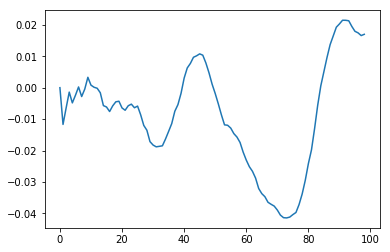

In [628]:
matplotlib.pyplot.plot(train_errors);

In [629]:
knn = KNeighborsRegressor(10)
knn.fit(X_train, y_train)
y_k_predict = knn.predict(X_train)

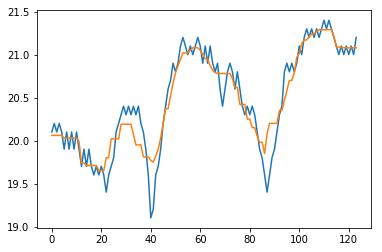

In [630]:
matplotlib.pyplot.plot(list(y_train))
matplotlib.pyplot.plot(y_k_predict.reshape(y_k_predict.shape[0]));

In [631]:
D_in = 4
D_out = 1
N = X_train.shape[0]

In [632]:
# Zufällige initialisierung der Gewichte
w = np.random.randn(D_in, D_out)
w

array([[-1.0516681 ],
       [-0.18342488],
       [-2.01625916],
       [-1.11948953]])

In [633]:
learning_rate = 1e-1

In [634]:
loss_hist = []
# Train
for t in range(1000):
    # Berechne die Vorhersage
    y_pred = X_train.dot(w)
    y_pred = y_pred.reshape(y_pred.shape[0])
    # Berechne den Fehler (Ausgabe des Fehlers alle 100 Iterationen)
    loss = np.square(y_pred - y_train).sum()
    if t % 1 == 0:
        loss_hist.append(loss)
        print(t, loss)

    # Berechne die Gradienten von w1 im Bezug auf den Fehler 
    grad_y_pred = 2.0 * (y_pred - y_train)
    grad_w = (1/N) * X_train.T.dot(grad_y_pred)

    # Aktualisiere die Gewichte mittels Gradienten Abstieg
    w -= learning_rate * grad_w.reshape(4,1)

ValueError: shapes (124,2) and (4,1) not aligned: 2 (dim 1) != 4 (dim 0)

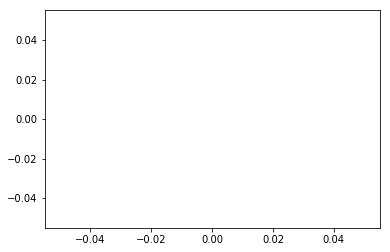

In [635]:
matplotlib.pyplot.plot(loss_hist);

In [636]:
y_pred = X_train.dot(w)

ValueError: shapes (124,2) and (4,1) not aligned: 2 (dim 1) != 4 (dim 0)

In [576]:
len(list(y_pred.reshape(y_pred.shape[0])))

211

In [577]:
sklearn.metrics.mean_squared_error(list(y_train), list(y_pred.reshape(y_pred.shape[0])))

42.78922807866793

In [578]:
len(list(y_train))

211

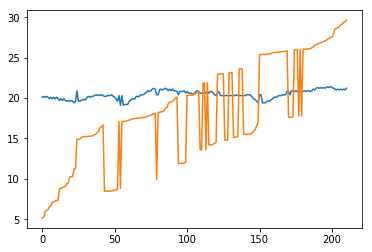

In [579]:

matplotlib.pyplot.plot(list(y_train))
matplotlib.pyplot.plot(list(y_pred));

In [580]:
#error = 
error = list(np.array(list(y_train)) - np.array(list(y_pred.reshape(y_pred.shape[0]))))

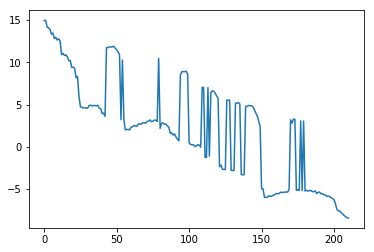

In [581]:
matplotlib.pyplot.plot(error);